\author{Lewis Li, Daniel Brito}
# Reservoir Parameters
In this notebook, we will analyze the recovery and production rates in a steam assisted gravity drainage (SAGD) project. The analysis uses the data from Butler, 1991. The reservoir parameters are specified below:

|Symbol    | Units   | Value   | Description  |  
|---|---|---|----------------------------------|
|$T_r$   | C  | 15  | Reservoir temperature |  
|$T_s$   | C  | 188  | Steam temperature |  
|$m_{exp}$   | m | 3.4  | Kinematic viscosity exponent |  
|$\mu_{Bitumen,188}$   | cs | 7.8  | Bitumen kinematic  viscosity @ 188C |  
|$r_{thickness}$   | m | 20  | Reservoir thickness |  
|$\alpha$| $\frac{m^2}{D}$ |  0.07 | Thermal diffusivity |
|$\phi$  | % |0.33 | Porosity |
|$S_o$ | % | 0.75 | Initial oil saturation |
|$S_{or}$ | % |  0.13 | Residual oil saturation |
|$K_{eff}$ | D |  0.4 | Effective permeability for oil flow |
|$D_{well}$ | m |  2.5 | Distance between reservoir's base and producers |
|w | m | 75 | Spacing between wells |
|$T_{total}$ | years |  7 | Evaluation period |
|g | $\frac{m}{s^2}$ | 9.81 | Accelerationb due to gravity |


In [1]:
% Reservoir temperature (C)
Tr = 15;                    
% Steam temperature (C)
Ts = 188;                   
% Kinematic viscosity exponent (m)
m_exp = 3.4;                
% Bitumen kinematic  viscosity @ 188C (cs)
mu_Bitumen188 = 7.8;        
% Reservoir thickness (m)
resThickness = 20;          
% Thermal diffusivity (m^2/D)
alpha = 0.07;               
% Porosity
phi = 0.33;                 
% Initial oil saturation
S_o = 0.75;                 
% Residual oil saturation
S_or = 0.13;                
% Effective permeability for oil flow (Darcy)
K_eff = 0.4;                
% Distance between reservoir's base and producers (m)
baseWellDistance = 2.5;     
% Spacing between wells (m)
w = 75;                     
% Evaluation period (years)
TotalTime = 7;              
% Gravity (m/s^2)
g = 9.81;                   

%% Conversion Factors
DarcyToM2 = 9.869233e-13;
SecondsToDays = 24*60*60;
DaysToSeconds = SecondsToDays;
YearsToDays = 365;
centistokesToM2S= 1e-6;

## Computing Depletion Rates
We will first compute the depletion rates, which depends on the position of the interface. We will express time as a dimensionless unit $T^*$:

$$T^* = \frac{t}{w} \sqrt{\frac{kg\alpha}{2 \phi \Delta S_o m \nu_o (T_s) h} }$$ 

In [2]:
h = resThickness - baseWellDistance;    % Height

tStarConstant = (2.0/w) * sqrt (((K_eff * DarcyToM2)*g*...
    alpha/(SecondsToDays) ) / ( phi * (S_o - S_or) * ...
    m_exp * mu_Bitumen188*centistokesToM2S * h)); 

To simplify the problem of solving for the interface position numerically, we approximate the dimensionless production rate using a polynomial:

$$q* = \sqrt{3/2} - {T^*}^2 \sqrt{\frac{2}{3}}$$
 
We will compute this over the entire time period of the project (7 years) discretized into 100 time steps.

In [3]:
n = 100;

%Time discretization (s)
t = linspace(0,TotalTime*YearsToDays*SecondsToDays,n);    

%Time discretization (years)
tYears = t./(YearsToDays*SecondsToDays);             

tStar = tStarConstant*t;
qStar = sqrt(3/2) - sqrt(2/3)*tStar.^2;

Likewise, the production is given by:
$$q = \frac{2\times q^*}{F} $$
where F is a dimensionless factor given by:
$$F = \sqrt{\frac{m\nu_s}{kg\alpha \phi h \Delta S_o}}$$

In [4]:
FFactor = sqrt( (m_exp*mu_Bitumen188*centistokesToM2S) /...
    ( (K_eff * DarcyToM2) * g *(alpha/(SecondsToDays)) * ...
    h * phi * (S_o - S_or) ) );                
q = 2*qStar*SecondsToDays./FFactor;

The recovery is then estimated as:

$$ Rev = \int q^* dt^*$$

In this case, we can analytically integrate our expression for q* to obtain:

$$ Rev = \sqrt{\frac{3}{2}} T^* - \frac{1}{3} {T^*}^3 \sqrt{\frac{2}{3}}  $$

In [5]:
Recovery = sqrt(3/2)*tStar - tStar.^3*sqrt(2/3)/3;

DepletionResults = [tYears' tStar' qStar' Recovery' q'];
ColumnNames = {'Time, years', 't*', 'q*','Recovery','q,m^3/(m day)'}; 

DepletionResults = [ColumnNames; num2cell(DepletionResults)];
display(DepletionResults)


DepletionResults = 

    'Time, years'    't*'        'q*'        'Recovery'    'q,m^3/(m day)'
    [          0]    [     0]    [1.2247]    [       0]    [       0.1377]
    [     0.0707]    [0.0108]    [1.2246]    [  0.0132]    [       0.1377]
    [     0.1414]    [0.0216]    [1.2244]    [  0.0265]    [       0.1377]
    [     0.2121]    [0.0324]    [1.2239]    [  0.0397]    [       0.1376]
    [     0.2828]    [0.0432]    [1.2232]    [  0.0529]    [       0.1376]
    [     0.3535]    [0.0540]    [1.2224]    [  0.0661]    [       0.1375]
    [     0.4242]    [0.0649]    [1.2213]    [  0.0794]    [       0.1374]
    [     0.4949]    [0.0757]    [1.2201]    [  0.0925]    [       0.1372]
    [     0.5657]    [0.0865]    [1.2186]    [  0.1057]    [       0.1371]
    [     0.6364]    [0.0973]    [1.2170]    [  0.1189]    [       0.1369]
    [     0.7071]    [0.1081]    [1.2152]    [  0.1320]    [       0.1367]
    [     0.7778]    [0.1189]    [1.2132]    [  0.1452]    [       0.1364]
    

## Rates From Rising Steam
We next compute the rates for the rising steam chamber using:

$$q_{cum} = 2.25 \left( \frac{kg \alpha}{m \nu_s} \right) ^\frac{2}{3} (\phi \Delta S_o)^\frac{1}{3} t^\frac{4}{3} $$

$$q = 3 \left( \frac{kg \alpha}{m \nu_s} \right) ^\frac{2}{3} (\phi \Delta S_o)^\frac{1}{3} t^\frac{1}{3} $$

and recovery is given by:

$$Rev = \frac{q_{cum}}{h\phi \Delta S_o (spacing)}$$

In [6]:
Coef1 = (((K_eff * DarcyToM2)*g*alpha/(SecondsToDays))/...
    ( m_exp * mu_Bitumen188*centistokesToM2S ) )^(2/3);
Coef2 = (phi * (S_o - S_or) )^(1/3);

qCumRise = 2.25*Coef1*Coef2*t.^(4/3)*SecondsToDays;
qRise = 3*Coef1*Coef2*t.^(1/3)*SecondsToDays;
RecoveryRise = qCumRise./(h*phi*(S_o - S_or)*w*SecondsToDays);

SteamResults = [tYears' qRise' RecoveryRise'];
ColumnNames = {'Time, years', 'q,m^3/(m day)','Recovery',}; 

EndIndex = sum(RecoveryRise<=1)+1;
Results = [ColumnNames; num2cell(SteamResults)];
display(Results(1:EndIndex,:))

'Time, years'    'q,m^3/(m day)'    'Recovery'
    [          0]    [            0]    [       0]
    [     0.0707]    [       0.0481]    [  0.0035]
    [     0.1414]    [       0.0606]    [  0.0087]
    [     0.2121]    [       0.0694]    [  0.0150]
    [     0.2828]    [       0.0763]    [  0.0220]
    [     0.3535]    [       0.0822]    [  0.0296]
    [     0.4242]    [       0.0874]    [  0.0378]
    [     0.4949]    [       0.0920]    [  0.0464]
    [     0.5657]    [       0.0962]    [  0.0555]
    [     0.6364]    [       0.1000]    [  0.0649]
    [     0.7071]    [       0.1036]    [  0.0747]
    [     0.7778]    [       0.1069]    [  0.0848]
    [     0.8485]    [       0.1101]    [  0.0952]
    [     0.9192]    [       0.1131]    [  0.1060]
    [     0.9899]    [       0.1159]    [  0.1170]
    [     1.0606]    [       0.1186]    [  0.1282]
    [     1.1313]    [       0.1212]    [  0.1397]
    [     1.2020]    [       0.1236]    [  0.1515]
    [     1.2727]    [       0.1260

## Computing the time changeover point
The time changeover is the intersection point of both curves.

In [7]:
warning('off','all')
addpath('../matlab')
[RecoveryIntersection,qIntersection] = ...
    intersections(Recovery',q,RecoveryRise',qRise,1); 

% Determine time step where intersect occurs for depletion
RecoveryRow = sum(Recovery<=RecoveryIntersection);

% Determine time step where intersect occurs for depletion
RecoveryRiseRow = sum(RecoveryRise<=RecoveryIntersection);

timeCalcDepletion = YearsToDays * tYears(RecoveryRow-1);
timeCalcSteam = YearsToDays * tYears(RecoveryRiseRow-1);
deltaTime = timeCalcSteam - timeCalcDepletion;

display(['The changeover point occurs at ' num2str(qIntersection) ...
    ' and recovery of ' num2str(RecoveryIntersection)]);
display(['Corresponds to ' num2str(timeCalcSteam) ...
    ' days production from steam']);
display(['Corresponds to ' num2str(timeCalcDepletion) ...
    ' days production from depletion']);
display(['Yields a difference of ' num2str(deltaTime) ' days']);


The changeover point occurs at 0.13488 and recovery of 0.21457
Corresponds to 541.9697 days production from steam
Corresponds to 387.1212 days production from depletion
Yields a difference of 154.8485 days


## Computing the Response Rates
We can now plot production rate versus recovery and visualize where the crossover point occurs.

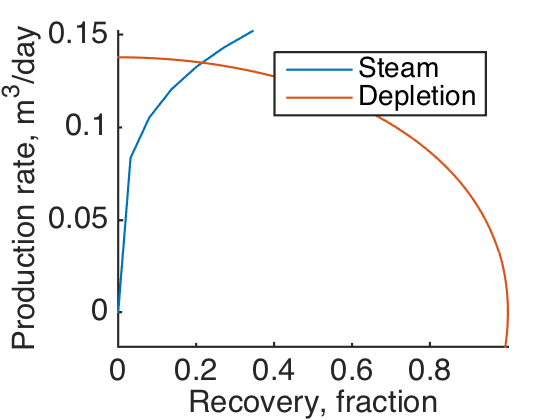

In [12]:
% The rates for production are from steam until the changeover point, and
% then the rates are from depeletion.
ChangeOverTime = timeCalcSteam/YearsToDays;
StepSize = 0.25;

% Steam-based production (computed as function of time in seconds)

timeSteam = (0:StepSize:1.5)*ChangeOverTime*YearsToDays*DaysToSeconds;
qCumSteam = (2.25 * Coef1 * Coef2 * (timeSteam).^(4/3)) * DaysToSeconds;
qSteam = (3 * Coef1 * Coef2 * (timeSteam).^(1/3)) * DaysToSeconds;        
RecoverySteam = qCumSteam ./ ( h*phi*(S_o - S_or)*w*DaysToSeconds );

% Set up time for depeletion (including time correction)
StepSize = 0.05;
timeDepletion = (0:(ChangeOverTime*StepSize):(TotalTime+2) - ...
    deltaTime/YearsToDays) * YearsToDays*DaysToSeconds; 
tStarDepletion = tStarConstant * timeDepletion; 
qStarDepletion = sqrt(1.5) - (tStarDepletion.^2)*sqrt(2/3);
q = 2 * qStarDepletion * (DaysToSeconds)/( FFactor ); 
recoveryFactor = sqrt(3/2)*tStarDepletion - ...
    (1/3)*(tStarDepletion.^3)*sqrt(2/3); 

figure;
FontSize = 15;
hold on;
plot(RecoverySteam,qSteam);
plot(recoveryFactor,q);
axis tight;
ylabel('Production rate, m^3/day','Fontsize', FontSize) % label left y-axis
xlabel('Recovery, fraction','Fontsize', FontSize) % label right y-axis
legend('Steam','Depletion');
set(gca,'FontSize',FontSize);


We will next plot the production from steam up to the changeover point, then the remaining rates are calculated from depletion after adjusting the time.

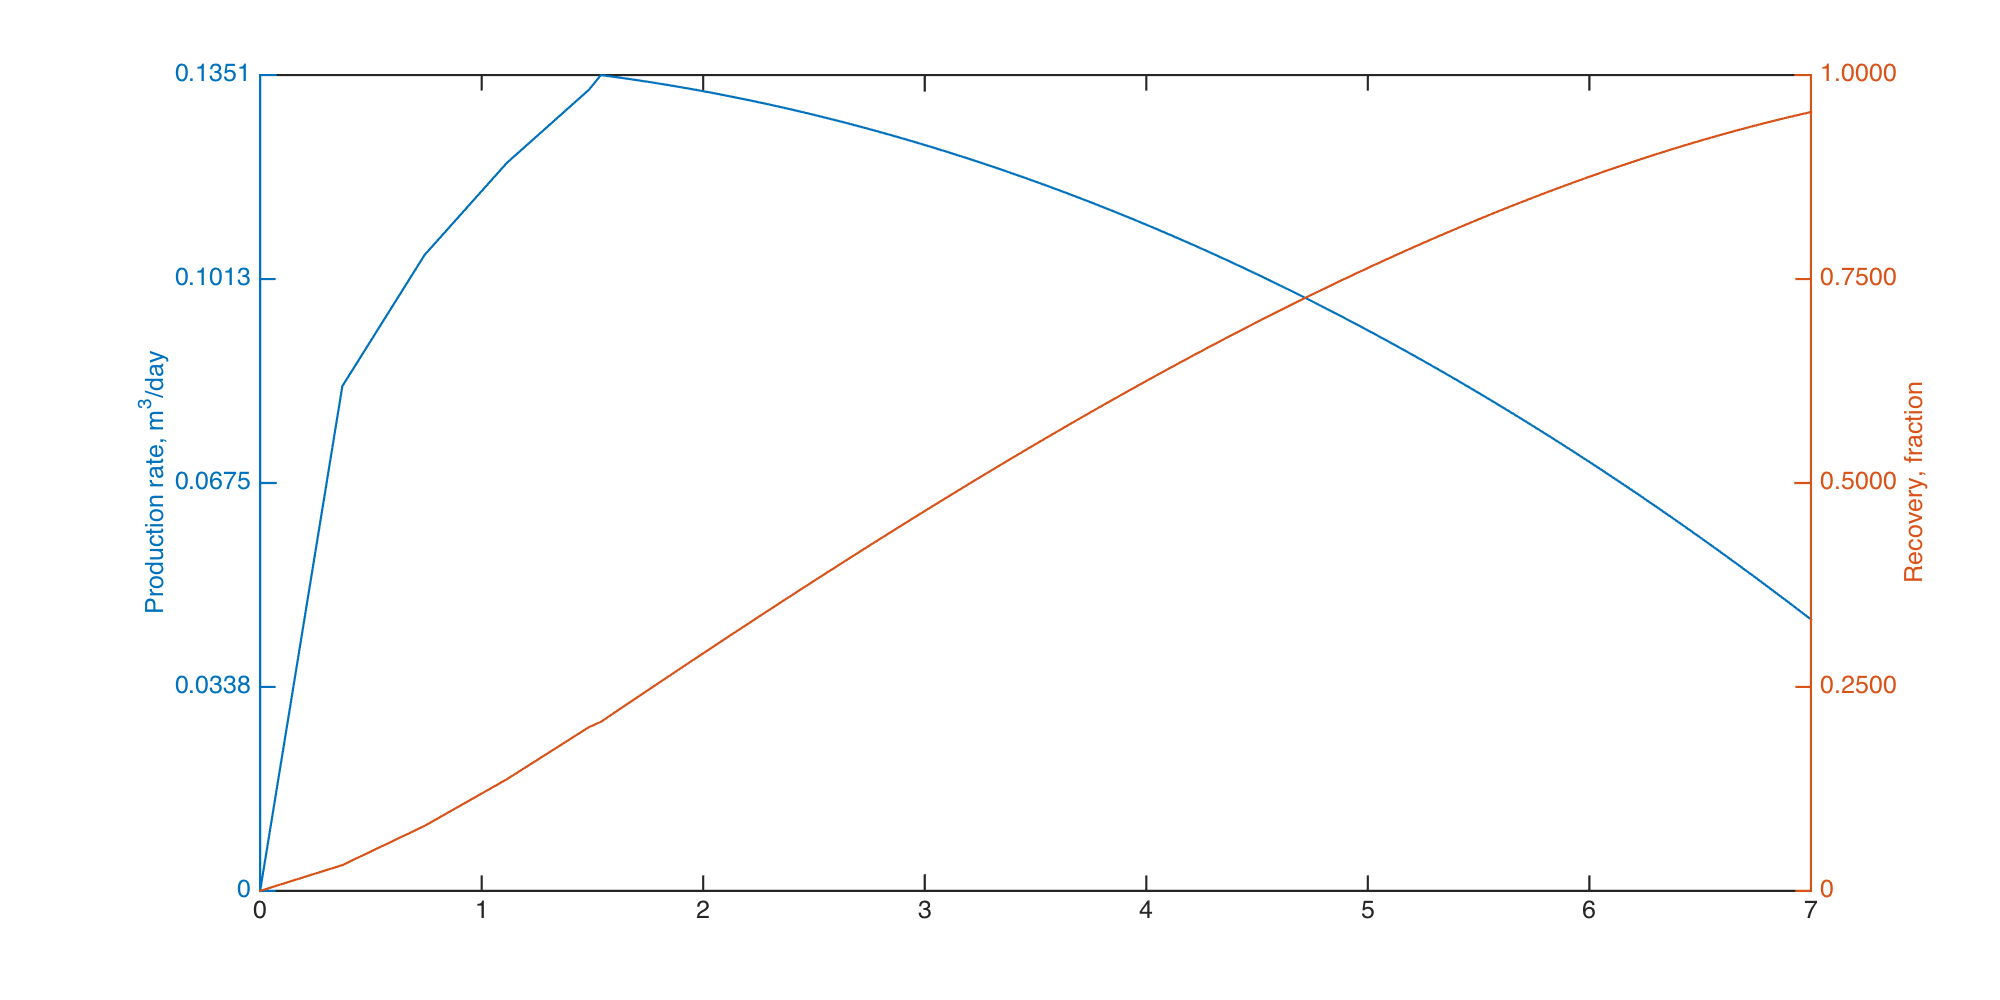

In [14]:
%plot inline -s 2000,1000
% Convert time from seconds to years and remove time correction
timeSteamYears = (1/(YearsToDays*DaysToSeconds)) * timeSteam; 
timeDepletionYears = (1/(YearsToDays*DaysToSeconds)) * ...
    timeDepletion + deltaTime/YearsToDays; 

% Find when steam time ends and depeletion starts
SteamEndTime = sum(timeSteamYears<=ChangeOverTime);
DepletionStartTime = find(timeDepletionYears>=ChangeOverTime,1);

qTotal = [(qSteam(:,1:SteamEndTime))';(q(:,DepletionStartTime:end))'];
timeTotal = [(timeSteamYears(:,1:SteamEndTime))' ; ...
    (timeDepletionYears(:,DepletionStartTime:end))'];

qStarTotal = [ zeros(SteamEndTime,1); ...
    (qStarDepletion(:,DepletionStartTime:end))'];
tStarTotal = [ zeros(SteamEndTime,1); ...
    (tStarDepletion(:,DepletionStartTime:end))'];
RecoveryTotal = [ (RecoverySteam(:,1:SteamEndTime))'; ...
    (recoveryFactor(:,DepletionStartTime:end))'];

figure
[haxes,hline1,hline2] = plotyy(timeTotal,qTotal,timeTotal, ...
    RecoveryTotal,'plot','plot');
ylabel(haxes(1),'Production rate, m^3/day','Fontsize', ...
    FontSize) % label left y-axis
ylabel(haxes(2),'Recovery, fraction','Fontsize', ...
    FontSize) % label right y-axis
xlabel(haxes(2),'Time (years)', 'Fontsize', ...
    FontSize) % label x-axis

Nticks = 5;
FontSize = 12;
set(haxes,'XLim',[0 TotalTime])
set(haxes(1),'YLim',[0 max(qTotal)]);
set(haxes(1),'ytick',linspace(0, max(qTotal), Nticks));
set(haxes(2),'YLim',[0 max(RecoveryTotal)]);
set(haxes(2),'ytick',linspace(0, max(RecoveryTotal), Nticks));
set(gcf,'color','w');
set(haxes(1),'FontSize',FontSize);
set(haxes(2),'FontSize',FontSize);

Finally, we disply the full result.

In [15]:
TotalResults = [timeTotal qTotal tStarTotal qStarTotal RecoveryTotal];
ColumnNames = {'Time, years', 'q,m^3/(m day)','t*','q*','Recovery'}; 
TotalResults = [ColumnNames; num2cell(TotalResults)];

EndIndex = sum(timeTotal<=TotalTime)+1;
display(TotalResults(1:EndIndex,:))


'Time, years'    'q,m^3/(m day)'    't*'        'q*'        'Recovery'
    [          0]    [            0]    [     0]    [     0]    [       0]
    [     0.3712]    [       0.0836]    [     0]    [     0]    [  0.0316]
    [     0.7424]    [       0.1053]    [     0]    [     0]    [  0.0797]
    [     1.1136]    [       0.1205]    [     0]    [     0]    [  0.1368]
    [     1.4848]    [       0.1327]    [     0]    [     0]    [  0.2008]
    [     1.5379]    [       0.1351]    [0.1702]    [1.2011]    [  0.2072]
    [     1.6121]    [       0.1347]    [0.1816]    [1.1978]    [  0.2208]
    [     1.6864]    [       0.1343]    [0.1929]    [1.1944]    [  0.2343]
    [     1.7606]    [       0.1339]    [0.2043]    [1.1907]    [  0.2479]
    [     1.8348]    [       0.1335]    [0.2156]    [1.1868]    [  0.2614]
    [     1.9091]    [       0.1330]    [0.2270]    [1.1827]    [  0.2748]
    [     1.9833]    [       0.1325]    [0.2383]    [1.1784]    [  0.2882]
    [     2.0576]    [       